In [1]:
%load_ext autoreload
%autoreload 2

from dataset import *
from model import build_model

from constants import USE_GPU, DATA_ROOT, ENCODERS, config_defaults, FEATURE_COLS
from config import Config
from test import calculate_metrics

import pandas as pd
import numpy as np

Deprecated cache directory found (/home/jacobgdt/.allennlp/datasets).  Please remove this directory from your system to free up space.


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


/home/jacobgdt/anaconda3/envs/cling/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df = pd.read_csv('../notebooks/preprocessed.csv')

print(df.shape)
df.head()

(5824, 74)


,name,age,report,Arm,Changeup,Control,Curveball,Cutter,Fastball,Field,...,pos_RF,pos_RHP,pos_SS,pos_A,pos_A+,pos_A-,pos_AA,pos_AAA,pos_R,pos_UNK
0,**Luke Heimlich,22.3,PERSON is a Level NUMBER sex offender and woul...,0,55,55,55,0,55,0,...,0,0,0,0,0,0,0,1,0,0
1,A.J. Alexy,18.7,PERSON made headlines for all the wrong reason...,0,50,50,55,0,55,0,...,0,1,0,0,0,0,0,0,1,0
2,A.J. Cole,22.0,"The ORGANIZATION have acquired PERSON twice, f...",0,55,55,0,0,70,0,...,0,1,0,0,0,0,0,1,0,0
3,A.J. Cole,24.0,Signed for an above-slot $NUMBER million as a ...,0,55,55,45,0,55,0,...,0,1,0,0,0,0,0,1,0,0
4,A.J. Cole,21.0,"It often takes time for those high-ceilinged, ...",0,50,50,0,0,70,0,...,0,1,0,0,0,0,1,0,0,0


In [3]:
df.label.value_counts()

0    4672
1    1152
Name: label, dtype: int64

In [4]:
pd.read_csv('train.csv').shape

/home/jacobgdt/anaconda3/envs/cling/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5500, 1966)

In [10]:
from allennlp.models.biattentive_classification_network import BiattentiveClassificationNetwork

In [5]:
#f_cols = pd.read_csv('train.csv').drop(columns=['name', 'report']).columns.tolist()
f_cols = FEATURE_COLS+[str(i) for i in range(1892)]

reader = MLBDataReader(feature_cols=f_cols, standardize=True)

ds = reader.read('train.csv')
vocab = Vocabulary.from_instances(ds, max_vocab_size=None)

Using csv reader.


/home/jacobgdt/anaconda3/envs/cling/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
5497it [00:00, 3748957.58it/s]
100%|██████████| 5497/5497 [00:00<00:00, 11986.90it/s]


In [11]:
help(BiattentiveClassificationNetwork)

Help on class BiattentiveClassificationNetwork in module allennlp.models.biattentive_classification_network:

class BiattentiveClassificationNetwork(allennlp.models.model.Model)
 |  This class implements the Biattentive Classification Network model described
 |  in section 5 of `Learned in Translation: Contextualized Word Vectors (NIPS 2017)
 |  <https://arxiv.org/abs/1708.00107>`_ for text classification. We assume we're
 |  given a piece of text, and we predict some output label.
 |  
 |  At a high level, the model starts by embedding the tokens and running them through
 |  a feed-forward neural net (``pre_encode_feedforward``). Then, we encode these
 |  representations with a ``Seq2SeqEncoder`` (``encoder``). We run biattention
 |  on the encoder output representations (self-attention in this case, since
 |  the two representations that typically go into biattention are identical) and
 |  get out an attentive vector representation of the text. We combine this text
 |  representation

In [13]:
bcn = BiattentiveClassificationNetwork(
    vocab=vocab,
    text_field_embedder=model.word_embeddings,
    embedding_dropout=0,
    pre_encode_feedforward=None,
    encoder=None,
    integrator=None,
    integrator_dropout=0,
    output_layer=None
)

TypeError: __init__() missing 6 required positional arguments: 'pre_encode_feedforward', 'encoder', 'integrator', 'integrator_dropout', 'output_layer', and 'elmo'

BasicTextFieldEmbedder(
  (token_embedder_tokens): Embedding()
)

In [6]:
config = Config(**config_defaults, track=False, indexer='base', model='base', encoder='cnn', features='union')
config.epochs=3
config.batch_size=4
config.learning_rate=0.01


model, trainer, vocab = build_model(config, reader, ds, vocab)
metrics = trainer.train()

Using CnnEncoder as encoder.


loss: 0.4767 ||: 100%|██████████| 688/688 [00:53<00:00, 12.91it/s]
loss: 0.3646 ||: 100%|██████████| 688/688 [00:52<00:00, 13.19it/s]
loss: 0.2941 ||: 100%|██████████| 688/688 [00:52<00:00, 13.18it/s]
loss: 0.2208 ||: 100%|██████████| 688/688 [00:51<00:00, 13.26it/s]
loss: 0.1591 ||: 100%|██████████| 688/688 [00:51<00:00, 13.27it/s]
loss: 0.1042 ||: 100%|██████████| 688/688 [00:51<00:00, 13.27it/s]
loss: 0.0675 ||: 100%|██████████| 688/688 [00:52<00:00, 13.22it/s]
loss: 0.0403 ||: 100%|██████████| 688/688 [00:51<00:00, 13.27it/s]
loss: 0.0239 ||: 100%|██████████| 688/688 [00:52<00:00, 13.18it/s]
loss: 0.0135 ||: 100%|██████████| 688/688 [00:51<00:00, 13.27it/s]


In [7]:
test_ds = reader.read('test.csv')

/home/jacobgdt/anaconda3/envs/cling/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Using csv reader.


583it [00:00, 2409142.10it/s]


HBox(children=(IntProgress(value=0, max=19), HTML(value='')))


Distribution
---
0    526
1     57
dtype: int64
---
Balanced accuracy: 0.6449
Binary F-1: 0.4419
              precision    recall  f1-score   support

      minors       0.85      0.96      0.90       468
         mlb       0.67      0.33      0.44       115

    accuracy                           0.84       583
   macro avg       0.76      0.64      0.67       583
weighted avg       0.82      0.84      0.81       583



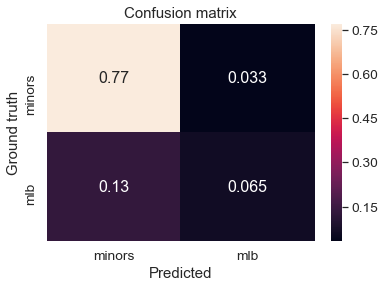

In [8]:
img, acc, f1 = calculate_metrics(model, test_ds, vocab, batch_size=32)

In [9]:
df[FEATURE_COLS].head()

,age,Arm,Changeup,Control,Curveball,Cutter,Fastball,Field,Hit,Power,...,pos_RF,pos_RHP,pos_SS,pos_A,pos_A+,pos_A-,pos_AA,pos_AAA,pos_R,pos_UNK
0,22.3,0,55,55,55,0,55,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,18.7,0,50,50,55,0,55,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,22.0,0,55,55,0,0,70,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,24.0,0,55,55,45,0,55,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,21.0,0,50,50,0,0,70,0,0,0,...,0,1,0,0,0,0,1,0,0,0
